In [0]:
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Making a list of missing value types
missing_values = ["n/a", "na", " "]


Problem:



1.  Train.csv - A single, continuous training segment of experimental data.
      
2. Test - A folder containing many small segments of test data.

3.  Slample_sumbission.csv - A sample submission file in the correct format.




In [0]:

train_df= pd.read_csv("/content/drive/My Drive/DATA COMPETITIONS/Club Mahindra/train.csv",na_values = missing_values)
test_df= pd.read_csv("/content/drive/My Drive/DATA COMPETITIONS/Club Mahindra/test.csv",na_values = missing_values)

In [169]:
print(train_df.shape)
print(test_df.shape)

(341424, 24)
(146765, 23)


In [170]:
train_df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [171]:
train_df.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code,amount_spent_per_room_night_scaled
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341310.000000,336660.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,3.738346,2.673862,7.260708,4.763303,3.193390,1.124209,7.720801
std,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,2.479054,0.885650,4.701283,3.103909,1.167824,0.329821,1.090109
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.600397
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,7.187260
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000,7.860814
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.000000,8.419144
max,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,60.000000,4.000000,38.000000,13.000000,24.000000,2.000000,10.816652


In [172]:
train_df.dtypes

reservation_id                         object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstatusid_code          

In [173]:
train_df.isnull().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

In [0]:
#these codes can not be imputed with mean/median values , removing them is the better option.

train_df = train_df.dropna()


In [217]:
test_df.dtypes

reservation_id               object
booking_date                 object
checkin_date                 object
checkout_date                object
channel_code                  int64
main_product_code             int64
numberofadults                int64
numberofchildren              int64
persontravellingid            int64
resort_region_code            int64
resort_type_code              int64
room_type_booked_code         int64
roomnights                    int64
season_holidayed_code       float64
state_code_residence        float64
state_code_resort             int64
total_pax                     int64
member_age_buckets           object
booking_type_code             int64
memberid                     object
cluster_code                 object
reservationstatusid_code     object
resort_id                    object
dtype: object

In [218]:
train_df.isnull().sum()

reservation_id                        0
booking_date                          0
checkin_date                          0
checkout_date                         0
channel_code                          0
main_product_code                     0
numberofadults                        0
numberofchildren                      0
persontravellingid                    0
resort_region_code                    0
resort_type_code                      0
room_type_booked_code                 0
roomnights                            0
season_holidayed_code                 0
state_code_residence                  0
state_code_resort                     0
total_pax                             0
member_age_buckets                    0
booking_type_code                     0
memberid                              0
cluster_code                          0
reservationstatusid_code              0
resort_id                             0
amount_spent_per_room_night_scaled    0
dtype: int64

In [219]:
train_df.shape

(336546, 24)

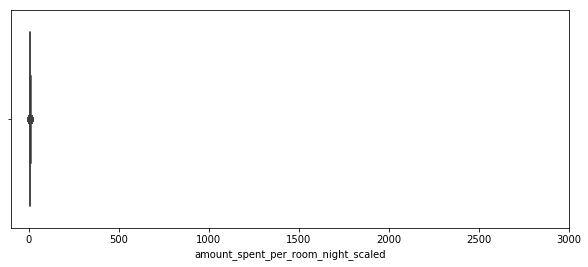

In [178]:
#lets check if their is any outliers in the amount spent columns 
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=train_df.amount_spent_per_room_night_scaled)

In [0]:
#store reservation id and amount_spent_per_room_night_scaled prediction separately

res_id = test_df['reservation_id']
y_train= train_df.iloc[:,-1]


In [221]:
#now join the train and test data to further analyse the data
#but first drop the last column of train data 

new_train_df= train_df.drop(['amount_spent_per_room_night_scaled'],axis=1)

total_data= pd.concat([new_train_df,test_df], axis =0)
#total_data.tail(10)
total_data.shape


(481016, 23)

In [222]:
total_data.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...


In [0]:
total_data['member_age_buckets']=total_data['member_age_buckets'].replace(('A','B','C','D','E','F','G','H','I','J'),(0,1,2,3,4,5,6,7,8,9))




In [224]:
total_data.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,2.0,7.0,3,3,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,2.0,7.0,5,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,2.0,7.0,1,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,2.0,7.0,2,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,2.0,7.0,2,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...


In [0]:
#similarly encode cluster_code and reservationstatusid_code

total_data['cluster_code']=total_data['cluster_code'].replace(('A','B','C','D','E','F'),(0,1,2,3,4,5))




In [0]:
total_data['reservationstatusid_code']=total_data['reservationstatusid_code'].replace(('A','B','C','D'),(0,1,2,3))

In [227]:
total_data.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,2.0,7.0,3,3,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,5,2,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,2.0,7.0,5,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,5,0,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,2.0,7.0,1,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,4,0,535fa30d7e25dd8a49f1536779734ec8286108d115da50...
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,2.0,7.0,2,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,3,0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,2.0,7.0,2,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,3,0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...


In [228]:
corr_metrics = total_data.corr()
corr_metrics.style.background_gradient()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code
channel_code,1,0.0763861,0.0535405,-0.173792,0.00916314,0.0401129,-0.0587896,-0.00158927,-0.0769797,-0.131172,0.0464612,0.0354505,0.043463,-0.032552,0.197725,-0.0824467,-0.0237345
main_product_code,0.0763861,1,-0.0520317,-0.0364052,-0.0226545,-0.0361248,-0.00148657,0.00623469,-0.125374,0.329139,0.0244669,-0.0288422,0.00216778,-0.124307,0.186049,0.0312218,0.00892146
numberofadults,0.0535405,-0.0520317,1,-0.0472096,0.0144816,-0.0192678,-0.0427842,-0.097889,0.573729,0.0783973,-0.0129892,0.0191129,0.099434,0.076378,-0.0344329,0.0239289,0.00787214
numberofchildren,-0.173792,-0.0364052,-0.0472096,1,-0.0599281,-0.0314067,-0.0312601,-0.109153,0.0930316,-0.0178753,-0.0322151,-0.0147197,0.198212,-0.140199,-0.0328129,0.0603795,-0.00224623
persontravellingid,0.00916314,-0.0226545,0.0144816,-0.0599281,1,-0.00879595,0.00155138,0.0151972,-0.00125455,0.0113282,-0.0069809,0.00100603,-0.0281172,-0.0130061,-0.027552,0.00810085,-0.00278369
resort_region_code,0.0401129,-0.0361248,-0.0192678,-0.0314067,-0.00879595,1,0.255215,0.0771946,0.0133708,-0.0447803,0.148971,0.00672736,-0.00615592,-0.0153428,-0.0276805,-0.511975,-0.00521514
resort_type_code,-0.0587896,-0.00148657,-0.0427842,-0.0312601,0.00155138,0.255215,1,0.225308,0.0364661,0.0406812,0.0498284,-0.0531212,-0.0886677,0.00756178,-0.0140538,-0.213789,-0.00804818
room_type_booked_code,-0.00158927,0.00623469,-0.097889,-0.109153,0.0151972,0.0771946,0.225308,1,0.172101,-0.0122055,0.0144526,0.121037,-0.432088,0.024898,-0.129297,-0.155223,-0.0110455
roomnights,-0.0769797,-0.125374,0.573729,0.0930316,-0.00125455,0.0133708,0.0364661,0.172101,1,0.0254569,-0.0100617,0.00711535,-0.11636,0.0934358,-0.142061,-0.00539742,-0.00215906
season_holidayed_code,-0.131172,0.329139,0.0783973,-0.0178753,0.0113282,-0.0447803,0.0406812,-0.0122055,0.0254569,1,-0.00444872,-0.0490858,-0.112791,-0.0109786,0.00255683,0.0740217,0.0438693


In [188]:
"""""def scatter(train_df, column):
    plt.figure()
    plt.scatter(train_df[column] , train_df['amount_spent_per_room_night_scaled'])
    plt.ylabel('amount_spent_per_room_night_scaled')
    plt.xlabel(column)"""



'""def scatter(train_df, column):\n    plt.figure()\n    plt.scatter(train_df[column] , train_df[\'amount_spent_per_room_night_scaled\'])\n    plt.ylabel(\'amount_spent_per_room_night_scaled\')\n    plt.xlabel(column)'

In [148]:
"""scatter(train_df, 'booking_date')
scatter(train_df, 'channel_code')
scatter(train_df, 'main_product_code')
scatter(train_df, 'persontravellingid')
scatter(train_df, 'resort_region_code')
scatter(train_df, 'resort_type_code')
scatter(train_df, 'room_type_booked_code')
scatter(train_df, 'roomnights')
scatter(train_df, 'season_holidayed_code')
scatter(train_df, 'state_code_residence')
scatter(train_df, 'state_code_resort')
scatter(train_df, 'total_pax')
scatter(train_df, 'member_age_buckets')
scatter(train_df, 'booking_type_code')"""


"scatter(train_df, 'booking_date')\nscatter(train_df, 'channel_code')\nscatter(train_df, 'main_product_code')\nscatter(train_df, 'persontravellingid')\nscatter(train_df, 'resort_region_code')\nscatter(train_df, 'resort_type_code')\nscatter(train_df, 'room_type_booked_code')\nscatter(train_df, 'roomnights')\nscatter(train_df, 'season_holidayed_code')\nscatter(train_df, 'state_code_residence')\nscatter(train_df, 'state_code_resort')\nscatter(train_df, 'total_pax')\nscatter(train_df, 'member_age_buckets')\nscatter(train_df, 'booking_type_code')"

In [0]:
#data manipulation

total_data['booking_month'] = pd.to_datetime(total_data['booking_date'],format = "%d/%m/%y").dt.month

In [230]:
total_data.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,booking_month
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,5,2,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,4
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,5,0,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,1
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,4,0,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,1
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,3,0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,3,0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,9


In [0]:
total_data['checkin_date'] = pd.to_datetime(total_data['checkin_date'],format = "%d/%m/%y")
total_data['checkout_date'] = pd.to_datetime(total_data['checkout_date'],format = "%d/%m/%y")

total_data['stay_duration'] = (total_data['checkout_date'] - total_data['checkin_date']).dt.days

In [232]:
total_data.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,booking_month,stay_duration
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,2018-04-05,2018-04-06,3,1,2,0,46,3,...,3,3,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,5,2,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,4,1
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,2015-04-11,2015-04-16,1,1,2,0,46,3,...,5,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,5,0,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,1,5
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,2015-02-01,2015-02-05,1,1,2,0,47,1,...,1,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,4,0,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,1,4
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,2015-06-11,2015-06-16,1,1,2,2,46,2,...,2,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,3,0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5,5
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,2015-12-14,2015-12-19,1,1,2,0,46,2,...,2,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,3,0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,9,5


In [0]:
total_data = total_data.drop(columns=["booking_date", "checkin_date", "checkout_date","season_holidayed_code","state_code_residence"])

In [234]:
total_data.head()

,reservation_id,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,booking_month,stay_duration
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,3,1,2,0,46,3,3,3,1,3,3,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,5,2,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,4,1
1,03930f033646d073462b35d411616323597715ac4fc398...,1,1,2,0,46,3,3,4,5,5,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,5,0,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,1,5
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,1,1,2,0,47,1,5,4,4,1,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,4,0,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,1,4
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,1,1,2,2,46,2,2,3,5,2,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,3,0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5,5
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,1,1,2,0,46,2,2,4,5,2,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,3,0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,9,5


In [235]:
total_data.dtypes

reservation_id              object
channel_code                 int64
main_product_code            int64
numberofadults               int64
numberofchildren             int64
persontravellingid           int64
resort_region_code           int64
resort_type_code             int64
room_type_booked_code        int64
roomnights                   int64
state_code_resort            int64
total_pax                    int64
member_age_buckets           int64
booking_type_code            int64
memberid                    object
cluster_code                 int64
reservationstatusid_code     int64
resort_id                   object
booking_month                int64
stay_duration                int64
dtype: object

In [0]:
total_data['reservation_id'] = total_data['reservation_id'].astype('str')
total_data['memberid'] = total_data['memberid'].astype('str').astype('str')
total_data['resort_id'] = total_data['resort_id'].astype('str')

In [237]:
total_data.dtypes

reservation_id              object
channel_code                 int64
main_product_code            int64
numberofadults               int64
numberofchildren             int64
persontravellingid           int64
resort_region_code           int64
resort_type_code             int64
room_type_booked_code        int64
roomnights                   int64
state_code_resort            int64
total_pax                    int64
member_age_buckets           int64
booking_type_code            int64
memberid                    object
cluster_code                 int64
reservationstatusid_code     int64
resort_id                   object
booking_month                int64
stay_duration                int64
dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

total_data['reservation_id']=LabelEncoder().fit_transform(total_data['reservation_id'])

In [239]:
total_data.head()

,reservation_id,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,booking_month,stay_duration
0,13749,3,1,2,0,46,3,3,3,1,3,3,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,5,2,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,4,1
1,6623,1,1,2,0,46,3,3,4,5,5,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,5,0,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,1,5
2,392829,1,1,2,0,47,1,5,4,4,1,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,4,0,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,1,4
3,390199,1,1,2,2,46,2,2,3,5,2,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,3,0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5,5
4,277119,1,1,2,0,46,2,2,4,5,2,2,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,3,0,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,9,5


In [0]:
similarly

In [0]:
total_data['memberid']=LabelEncoder().fit_transform(total_data['memberid'])
total_data['resort_id']=LabelEncoder().fit_transform(total_data['resort_id'])

In [241]:
total_data.head()

,reservation_id,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,booking_month,stay_duration
0,13749,3,1,2,0,46,3,3,3,1,3,3,5,1,33872,5,2,7,4,1
1,6623,1,1,2,0,46,3,3,4,5,5,2,5,1,33872,5,0,1,1,5
2,392829,1,1,2,0,47,1,5,4,4,1,2,5,1,33872,4,0,9,1,4
3,390199,1,1,2,2,46,2,2,3,5,2,2,5,1,33872,3,0,25,5,5
4,277119,1,1,2,0,46,2,2,4,5,2,2,5,1,33872,3,0,25,9,5


In [0]:
#training and test datasets back


x_train = total_data.iloc[:336546,:]
x_test = total_data.iloc[336546:,:]



In [243]:
y_train.shape

(336546,)

In [0]:

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)



In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

In [246]:
#let's check with Linear FRegression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_val)

print("Training Accuracy: ", regressor.score(x_train, y_train))
print('Testing Accuarcy: ', regressor.score(x_val, y_val))


Training Accuracy:  0.11764899286531227
Testing Accuarcy:  0.11984706833881244


In [0]:
y_pred=regressor.predict(x_test)

In [0]:
submission = pd.DataFrame({'reservation_id': res_id,'amount_spent_per_room_night_scaled': y_pred})

In [249]:
filename = 'CM_submission_mlr.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: CM_submission_mlr.csv
